##Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
import copy


## Importing the Advertising Dataset
This dataset shows the effect of different types of advertising media on the sales of a company. We will try to predict the sales based on the advertising media(TV,Radio,Newspaper) as features.

In [ ]:
df=pd.read_csv("advertising (7).csv")

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.shape

(200, 4)

##Splitting the data into feature and target. Further doing 80-20 train -test split on data.

In [ ]:
features=df.iloc[:,:-1]
target=df["Sales"]
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [ ]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
x_train=x_train.to_numpy()
x_test=x_test.to_numpy()

In [ ]:
# print x_train
print("First five elements of x_train are:\n", x_train[:5])
#print y_train
print("Five first elements of y_train are:\n",y_train[:5])

First five elements of x_train are:
 [[116.    7.7  23.1]
 [177.    9.3   6.4]
 [ 43.1  26.7  35.1]
 [ 62.3  12.6  18.3]
 [224.    2.4  15.6]]
Five first elements of y_train are:
 [11.  14.8 10.1  9.7 16.6]


## Feature Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
std_sca=StandardScaler()
x_train=std_sca.fit_transform(x_train)
x_test=std_sca.transform(x_test)

## Single Prediction Function using Linear Regression


In [ ]:
def predict(x, w, b):
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters
      b (scalar):             model parameter

    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b
    return p


## Compute Cost With Multiple Variables


In [ ]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar
    return cost


##  Gradient Descent With Multiple Variables


In [ ]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err *X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

## Gradient Descent Algorithm Function

In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters
      b (scalar)       : Updated value of parameter
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history #return final w,b and J history for graphing

##Implementation of Gradient Descents
We run gradient descent algorithm for 1000 iterations with a learning rate 0.01 .It also displays the predictions made on train set.

In [ ]:
# initialize parameters
initial_w = np.zeros(x_train.shape[1])
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 1e-2
# run gradient descent
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost   128.32   
Iteration  100: Cost    18.24   
Iteration  200: Cost     3.60   
Iteration  300: Cost     1.64   
Iteration  400: Cost     1.38   
Iteration  500: Cost     1.34   
Iteration  600: Cost     1.34   
Iteration  700: Cost     1.34   
Iteration  800: Cost     1.34   
Iteration  900: Cost     1.34   
b,w found by gradient descent: 15.33,[4.58710485 1.48875696 0.0890254 ] 
prediction: 11.91, target value: 11.0
prediction: 15.33, target value: 14.8
prediction: 9.91, target value: 10.1
prediction: 9.46, target value: 9.7
prediction: 17.23, target value: 16.6
prediction: 7.23, target value: 7.6
prediction: 10.36, target value: 10.5
prediction: 15.24, target value: 14.6
prediction: 11.14, target value: 10.4
prediction: 11.72, target value: 12.0
prediction: 13.85, target value: 14.6
prediction: 14.67, target value: 16.7
prediction: 10.45, target value: 7.2
prediction: 9.28, target value: 6.6
prediction: 9.02, target value: 9.4
prediction: 12.48, target value: 11.0

## Cost vs Iterations

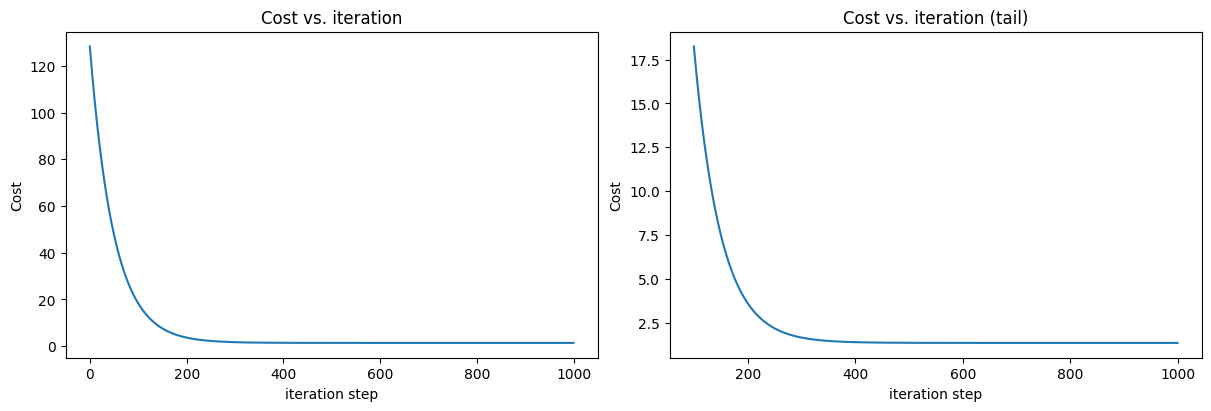

In [ ]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

## Results metrics(R2_score and MSE)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
y_pred_train=np.zeros(x_train.shape[0])
for i in range(x_train.shape[0]):
    y_pred_train[i]=np.dot(x_train[i], w_final) + b_final

In [ ]:
y_pred_test=np.zeros(x_test.shape[0])
for i in range(x_test.shape[0]):
    y_pred_test[i]=np.dot(x_test[i], w_final) + b_final

In [ ]:
print("R2_Score on train data: ",r2_score(y_train,y_pred_train))
print("R2_Score on test data: ",r2_score(y_test,y_pred_test))
print("MSE(Train):",mean_squared_error(y_train,y_pred_train))
print("MSE(Test):",mean_squared_error(y_test,y_pred_test))


R2_Score on train data:  0.9001415286506993
R2_Score on test data:  0.90587617179454
MSE(Train): 2.6761445816094485
MSE(Test): 2.9085298277597373


## Comparison with Sklearn Results

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_skl=lr.predict(x_test)
print(r2_score(y_test,y_pred_skl))
print(mean_squared_error(y_test,y_pred_skl))

0.9059011844150825
2.9077569102710927


## So,we are getting very similar results as compared to in-built sklearn LinearRegression model